# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    if response.status_code ==200:
        
        # Parse the JSON and retrieve data
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"].get("lat", None)
        city_lng = city_weather["coord"].get("lon", None)
        city_max_temp = city_weather["main"].get("temp_max", None)
        city_humidity = city_weather["main"].get("humidity", None)
        city_clouds = city_weather["clouds"].get("all", None)
        city_wind = city_weather["wind"].get("speed", None)
        city_country = city_weather["sys"].get("country", None)
        city_date = city_weather.get("dt", None)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    else:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malindi
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | leland
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | jardim
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | tenno
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | san luis de la loma
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | a

Processing Record 39 of Set 4 | revda
Processing Record 40 of Set 4 | kinkala
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | bahula
Processing Record 43 of Set 4 | ahau
City not found. Skipping...
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | bourbon-lancy
Processing Record 46 of Set 4 | ginir
Processing Record 47 of Set 4 | dongsheng
Processing Record 48 of Set 4 | belmonte
Processing Record 49 of Set 4 | dom pedrito
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | moniquira
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | tame
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | ba
City not found. Skipping...
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | market warsop
Processing Record 10 of Set 5 | dudinka
Processing Record 11 of Set 5 | swan hill
Processing Record 12 

Processing Record 29 of Set 8 | coalcoman de vazquez pallares
Processing Record 30 of Set 8 | vorgashor
Processing Record 31 of Set 8 | fort wellington
Processing Record 32 of Set 8 | rabaul
Processing Record 33 of Set 8 | dhenkanal
Processing Record 34 of Set 8 | kawthoung
City not found. Skipping...
Processing Record 35 of Set 8 | roma
Processing Record 36 of Set 8 | qarazhal
Processing Record 37 of Set 8 | ola
Processing Record 38 of Set 8 | altai
Processing Record 39 of Set 8 | smolyaninovo
Processing Record 40 of Set 8 | tchintabaraden
Processing Record 41 of Set 8 | carnarvon
Processing Record 42 of Set 8 | port macquarie
Processing Record 43 of Set 8 | paragominas
Processing Record 44 of Set 8 | tongliao
Processing Record 45 of Set 8 | aasiaat
Processing Record 46 of Set 8 | hinton
Processing Record 47 of Set 8 | yigo village
Processing Record 48 of Set 8 | chapada dos guimaraes
Processing Record 49 of Set 8 | port glaud
City not found. Skipping...
Processing Record 0 of Set 9 |

City not found. Skipping...
Processing Record 15 of Set 12 | makhambet
Processing Record 16 of Set 12 | birjand
Processing Record 17 of Set 12 | chifeng
Processing Record 18 of Set 12 | kastel stari
City not found. Skipping...
Processing Record 19 of Set 12 | pemba
Processing Record 20 of Set 12 | tafalla
Processing Record 21 of Set 12 | yusufeli
Processing Record 22 of Set 12 | san fernando de apure
Processing Record 23 of Set 12 | hayma'
City not found. Skipping...
Processing Record 24 of Set 12 | korotchaevo
City not found. Skipping...
Processing Record 25 of Set 12 | villa rica
Processing Record 26 of Set 12 | la ronge
Processing Record 27 of Set 12 | shwebo
Processing Record 28 of Set 12 | kolonia town
Processing Record 29 of Set 12 | garcia
Processing Record 30 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 31 of Set 12 | puerto deseado
Processing Record 32 of Set 12 | toliara
Processing Record 33 of Set 12 | pauini
Processing Record 34 of Set 12 | collie
Pr

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mulanje,-16.0316,35.5000,27.45,45,52,1.89,MW,1700845901
1,elne,42.6003,2.9715,17.17,64,0,8.75,FR,1700845901
2,adamstown,-25.0660,-130.1015,21.91,76,97,8.15,PN,1700845902
3,klyuchi,52.2667,79.1667,2.63,97,100,9.18,RU,1700845903
4,keflavik,64.0049,-22.5624,3.24,93,100,9.77,IS,1700845903


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mulanje,-16.0316,35.5000,27.45,45,52,1.89,MW,1700845901
1,elne,42.6003,2.9715,17.17,64,0,8.75,FR,1700845901
2,adamstown,-25.0660,-130.1015,21.91,76,97,8.15,PN,1700845902
3,klyuchi,52.2667,79.1667,2.63,97,100,9.18,RU,1700845903
4,keflavik,64.0049,-22.5624,3.24,93,100,9.77,IS,1700845903


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

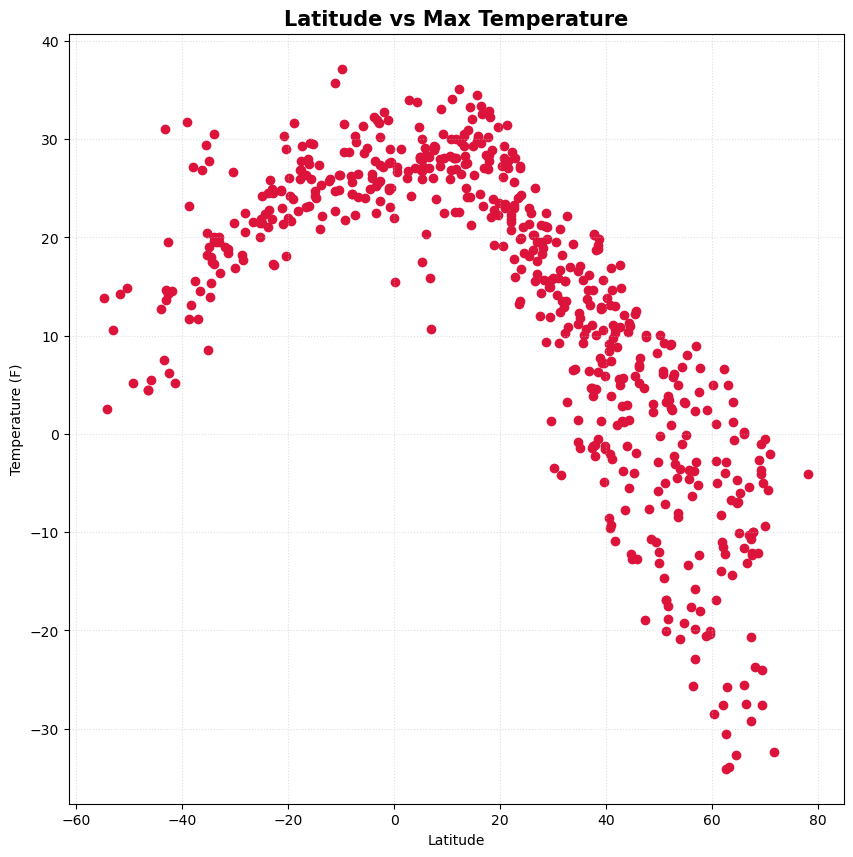

In [32]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (10,10))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = "crimson")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature", fontweight = "bold", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(color="silver", alpha= 0.5, linestyle=":")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

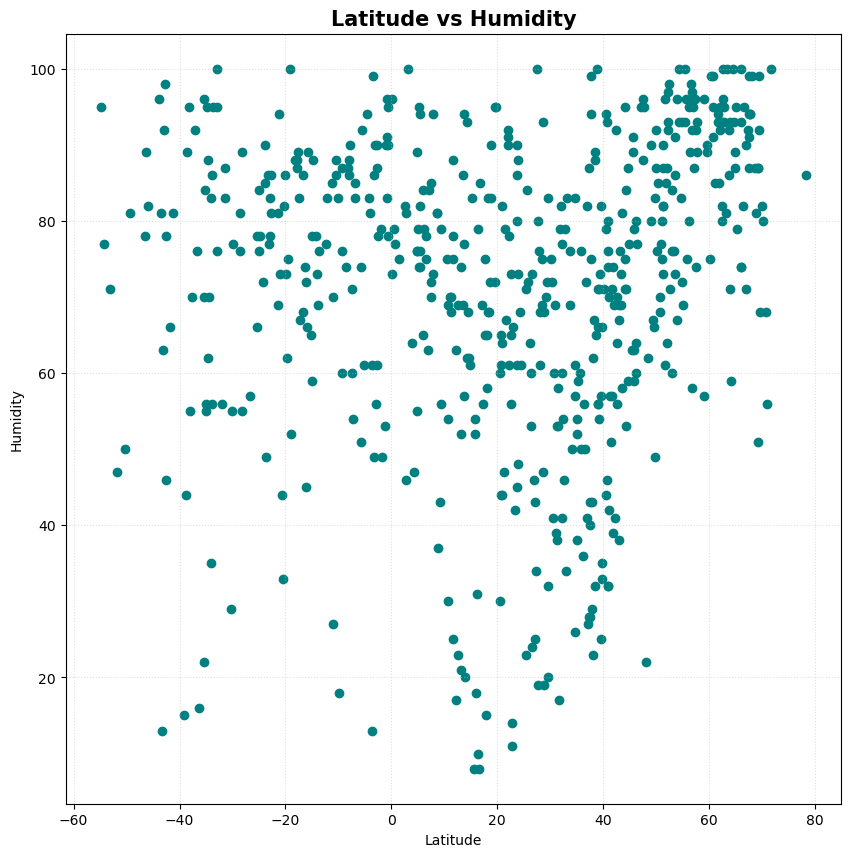

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (10,10))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = "teal")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity", fontweight = "bold", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color="silver", alpha= 0.5, linestyle=":")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

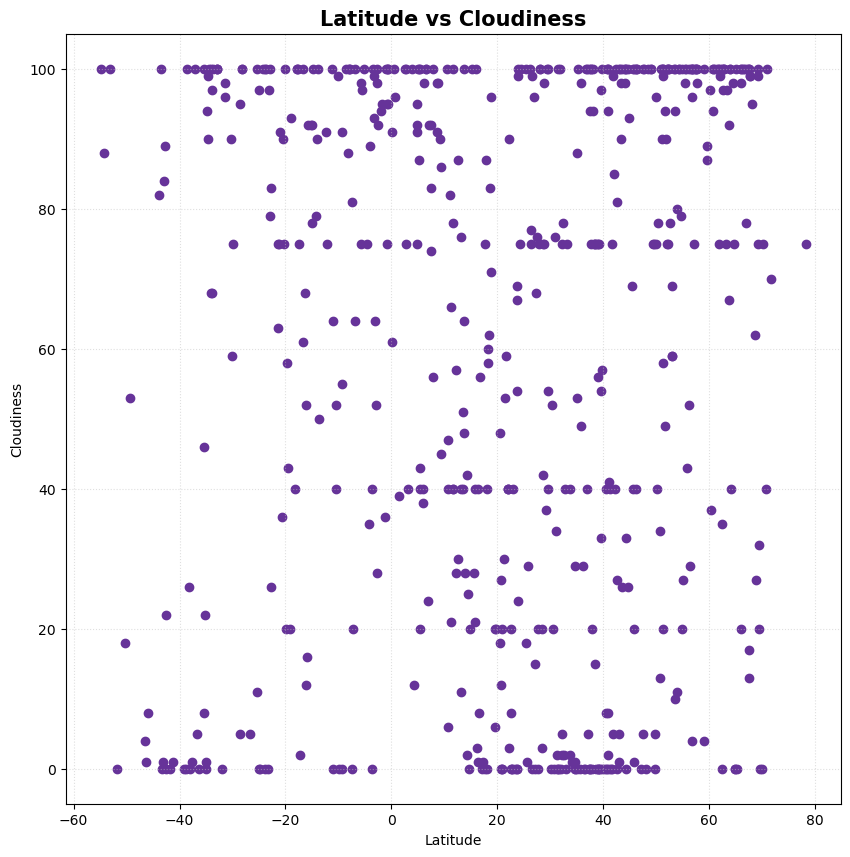

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (10,10))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = "rebeccapurple")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness", fontweight = "bold", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color="silver", alpha= 0.5, linestyle=":")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

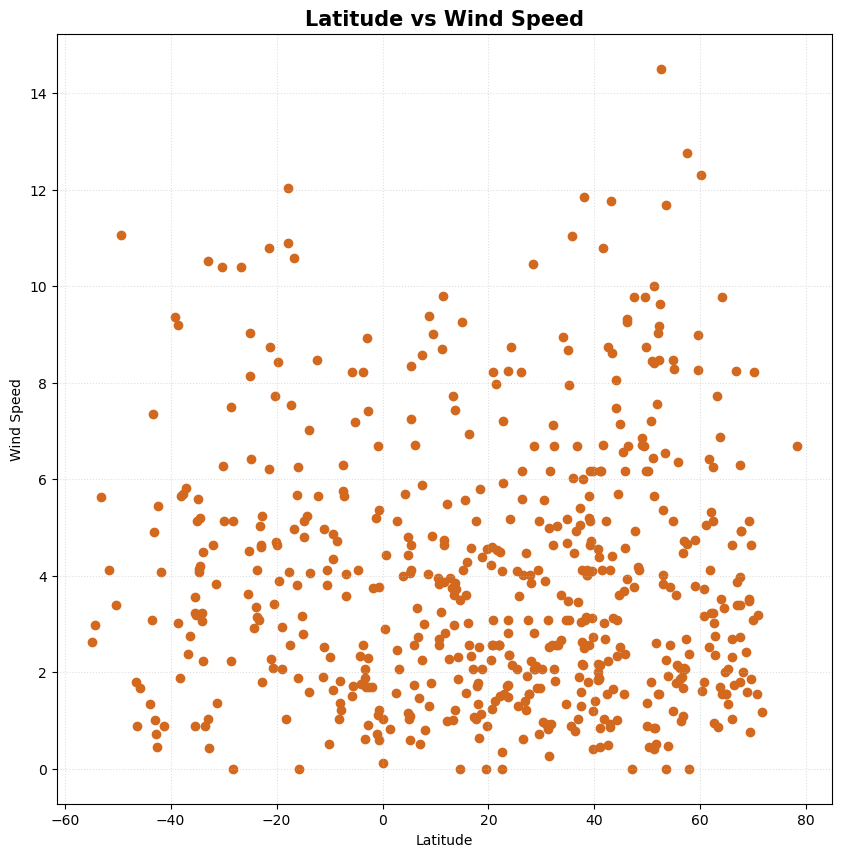

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (10,10))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = "chocolate")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed", fontweight = "bold", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color="silver", alpha= 0.5, linestyle=":")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values,y_values,x_label,y_label,hemisphere,annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # make plot
    plt.scatter(x_values,y_values, color = "rebeccapurple")
    plt.plot(x_values,regress_values, color = "chocolate")
    plt.annotate(line_eq, annot_loc, fontsize=15, color= "chocolate")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{x_label} vs {y_label} ({hemisphere} hemisphere)', fontweight = "bold", fontsize = 13)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,elne,42.6003,2.9715,17.17,64,0,8.75,FR,1700845901
3,klyuchi,52.2667,79.1667,2.63,97,100,9.18,RU,1700845903
4,keflavik,64.0049,-22.5624,3.24,93,100,9.77,IS,1700845903
6,faya-largeau,17.9257,19.1043,27.83,15,87,1.72,TD,1700845905
8,qui nhon,13.7667,109.2333,24.09,77,100,7.44,VN,1700845906


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mulanje,-16.0316,35.5000,27.45,45,52,1.89,MW,1700845901
2,adamstown,-25.0660,-130.1015,21.91,76,97,8.15,PN,1700845902
5,carnarvon,-24.8667,113.6333,21.46,78,0,6.43,AU,1700845904
7,puerto natales,-51.7236,-72.4875,14.25,47,0,4.12,CL,1700845906
10,black point,-34.6187,137.8972,15.40,88,90,4.13,AU,1700845908


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7401381788915686


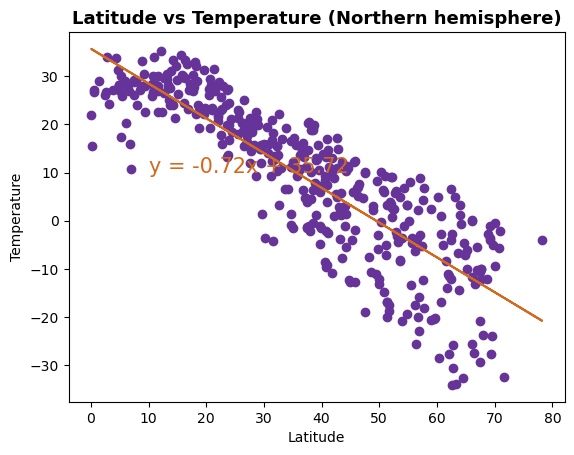

In [39]:
# Linear regression on Northern Hemisphere
x_label = "Latitude"
y_label = "Temperature"
hemisphere = "Northern"

linear_regression_plot(northern_hemi_df.Lat, northern_hemi_df["Max Temp"], x_label, y_label, hemisphere, (10,10))

The r-squared is: 0.531986150597889


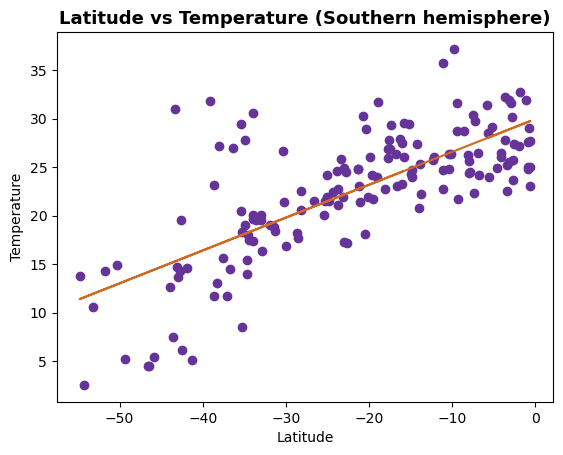

In [40]:
# Linear regression on Southern Hemisphere
x_label = "Latitude"
y_label = "Temperature"
hemisphere = "Southern"

linear_regression_plot(southern_hemi_df.Lat, southern_hemi_df["Max Temp"], x_label, y_label, hemisphere, (-40,40))

There is a clear correlation between latitude and Max Temp. The correlation is positive for the southern hemisphere and negative for the northern hemisphere and the r-squared for both models is greater than 0.5. This makes sense as maximum temperatures are expected to be higher the closer the city is to the equator (lat = 0.0) so we expect the model to be relatively accurate.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12110467046935874


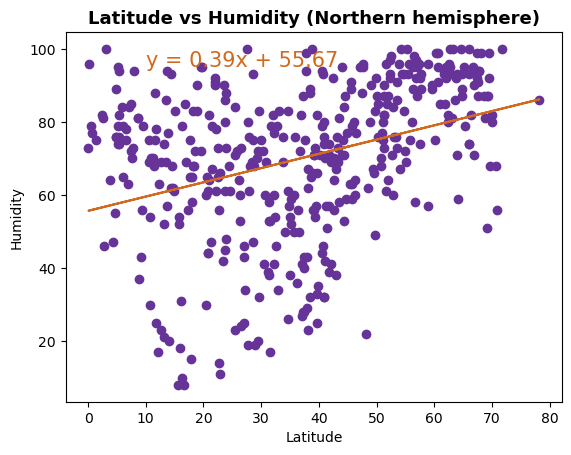

In [41]:
# Northern Hemisphere
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Northern"

linear_regression_plot(northern_hemi_df.Lat, northern_hemi_df["Humidity"], x_label, y_label, hemisphere, (10,95))

The r-squared is: 0.008175655912902138


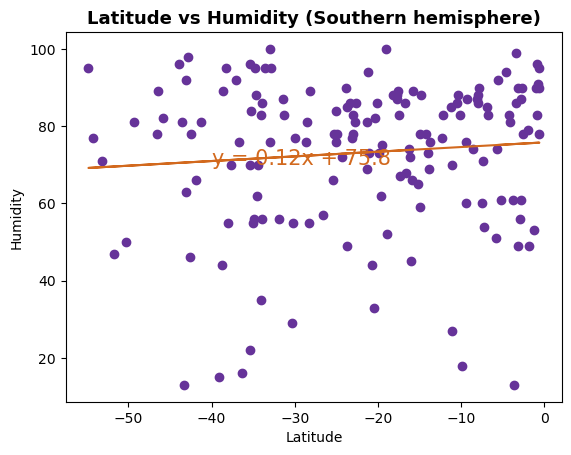

In [42]:
# Southern Hemisphere
x_label = "Latitude"
y_label = "Humidity"
hemisphere = "Southern"

linear_regression_plot(southern_hemi_df.Lat, southern_hemi_df["Humidity"], x_label, y_label, hemisphere, (-40,70))

In the northern hemisphere, there is a slightly positive correlation between latitude and humidity, however the r-squared for the model is 0.12, which means the model explains very little of the variability in humidity. In the southern hemisphere on the other hand, there is almost no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.030227609213708474


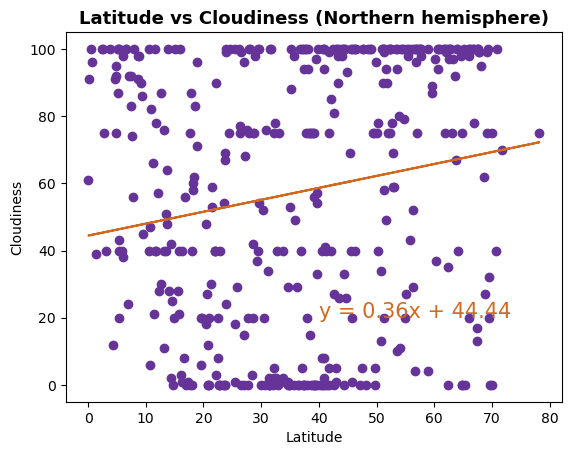

In [43]:
# Northern Hemisphere
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "Northern"

linear_regression_plot(northern_hemi_df.Lat, northern_hemi_df["Cloudiness"], x_label, y_label, hemisphere, (40,20))

The r-squared is: 0.07511620348590206


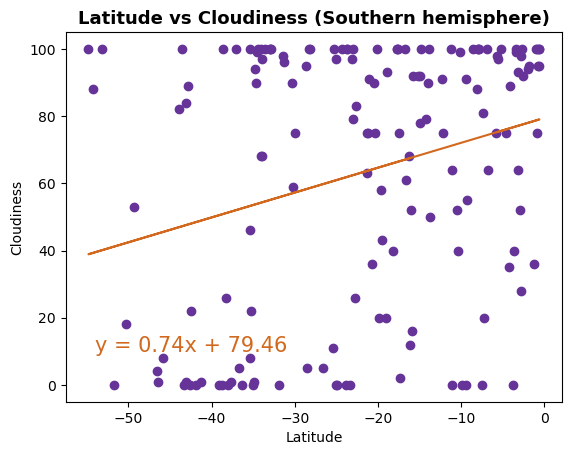

In [44]:
# Southern Hemisphere
x_label = "Latitude"
y_label = "Cloudiness"
hemisphere = "Southern"

linear_regression_plot(southern_hemi_df.Lat, southern_hemi_df["Cloudiness"], x_label, y_label, hemisphere, (-54,10))

There is a positive correlation between latitude and cloudiness in both the northern and southern hemisphere. This is counterintuitive as we usually expect the oposite relation between north and south hemisphere so we would need additional information to determine what other variables correlate with cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007700929605841472


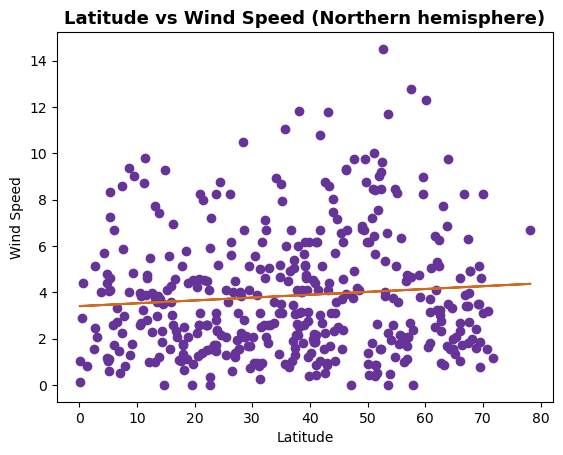

In [45]:
# Northern Hemisphere
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Northern"

linear_regression_plot(northern_hemi_df.Lat, northern_hemi_df["Wind Speed"], x_label, y_label, hemisphere, (10,17))

The r-squared is: 0.0020937590095178238


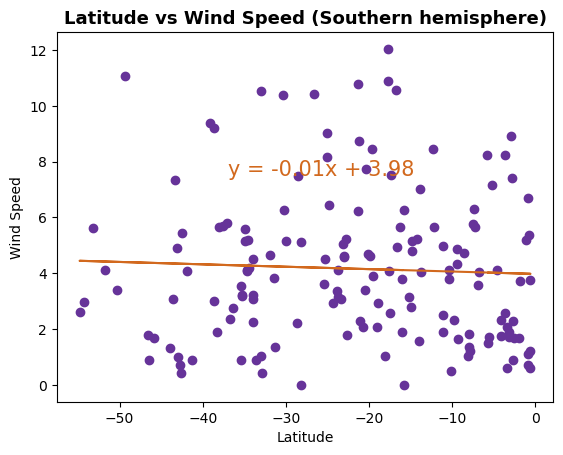

In [46]:
# Southern Hemisphere
x_label = "Latitude"
y_label = "Wind Speed"
hemisphere = "Southern"

linear_regression_plot(southern_hemi_df.Lat, southern_hemi_df["Wind Speed"], x_label, y_label, hemisphere, (-37,7.5))

There is a very slight positive correlation between latitude and wind speed in the northern hemisphere and negative in the southern hemisphere (There is less wind the closer we get to the equator).